In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('/workspaces/Mobile-Price-Classification/data/train.csv')

In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


<function matplotlib.pyplot.show(close=None, block=None)>

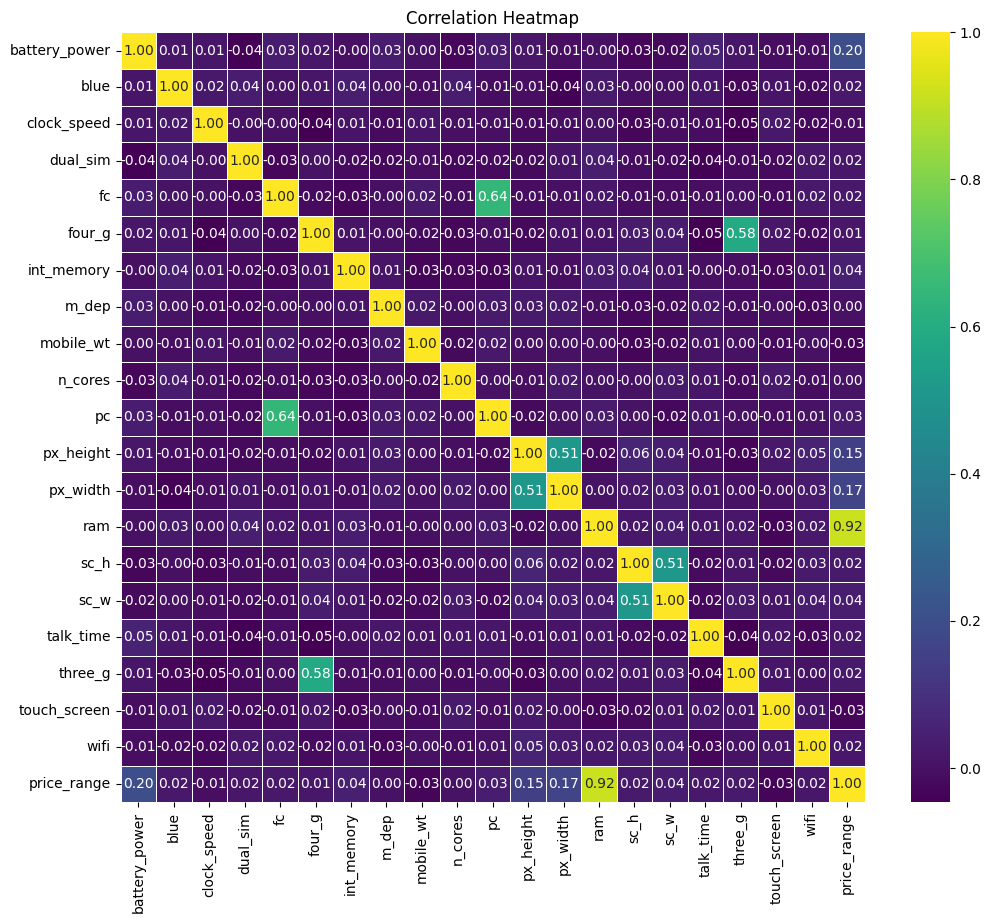

In [6]:
plt.figure(figsize=(12,10))
correlation_matrix =df.corr()
sns.heatmap(correlation_matrix ,annot=True ,fmt='.2f' ,cmap='viridis' ,linewidth =0.5)
plt.title('Correlation Heatmap')
plt.show

Ram has very high correlation to pricerange

In [7]:
threshold = 0.003
correlation_matrix = df.corr()
high_corr_features = correlation_matrix.index[abs(correlation_matrix['price_range'])>threshold].tolist()
high_corr_features.remove('price_range')
print(high_corr_features)

X_selected = df[high_corr_features]
Y = df['price_range']

['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']


In [8]:
X_selected

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,145,5,5,336,670,869,18,10,19,1,1,1


In [9]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X_selected)

In [10]:
import joblib

In [11]:
joblib.dump(scaler, "standard_scaler.pkl")

['standard_scaler.pkl']

In [12]:
X_train ,X_test ,Y_train ,Y_test = train_test_split(x_scaled ,Y ,test_size = 0.2 ,random_state =42)

In [13]:
model = LogisticRegression(max_iter=1000 , random_state = 42)
model.fit(X_train , Y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [14]:
X_selected.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [15]:
X_selected.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000


In [16]:
Y_pred = model.predict(X_test)

In [17]:
print(accuracy_score(Y_test , Y_pred))

0.9775


In [18]:
nbmodel = GaussianNB()

In [19]:
nbmodel.fit(X_train,Y_train)

GaussianNB()

In [20]:
y_pred = nbmodel.predict(X_test)

In [21]:
print(accuracy_score(Y_test,y_pred))

0.815


In [22]:
from sklearn.model_selection import cross_val_score

k_values = range(1, 50)
cv_scores = [cross_val_score(KNeighborsClassifier(n_neighbors=k), x_scaled, Y, cv=5).mean() for k in k_values]

optimal_k = k_values[np.argmax(cv_scores)]
print(f"Optimal K: {optimal_k}")

Optimal K: 45


In [23]:
knnmodel = KNeighborsClassifier(n_neighbors=45)

In [24]:
knnmodel.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=45)

In [25]:
y_pred = knnmodel.predict(X_test)

In [26]:
print(accuracy_score(Y_test,y_pred))

0.63


In [27]:
df['px_area'] = df['px_height'] * df['px_width']  # Total screen resolution
df['battery_per_core'] = df['battery_power'] / df['n_cores']  # Battery per CPU core
df['memory_density'] = df['ram'] / df['int_memory']  # RAM-to-storage ratio

In [28]:
df['ram'] = np.log(df['ram']) / np.log(2)  # Log base 2 to further compress RAM values

In [29]:
x = df[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width',
       'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi','px_area', 'battery_per_core', 'memory_density']]

'px_area', 'battery_per_core', 'memory_density'

In [30]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [31]:
joblib.dump(scaler, "minmax_scaler.pkl")

['minmax_scaler.pkl']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x_scaled, Y, test_size=0.33, random_state=42)

Hyperparameter Tuning

In [33]:
param_grid = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [34]:
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(f"Best Parameters for Decision Tree: {grid_search.best_params_}")

Best Parameters for Decision Tree: {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10}


In [35]:
dtmodel = grid_search.best_estimator_
y_pred = dtmodel.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred))

Decision Tree Accuracy: 0.6772727272727272


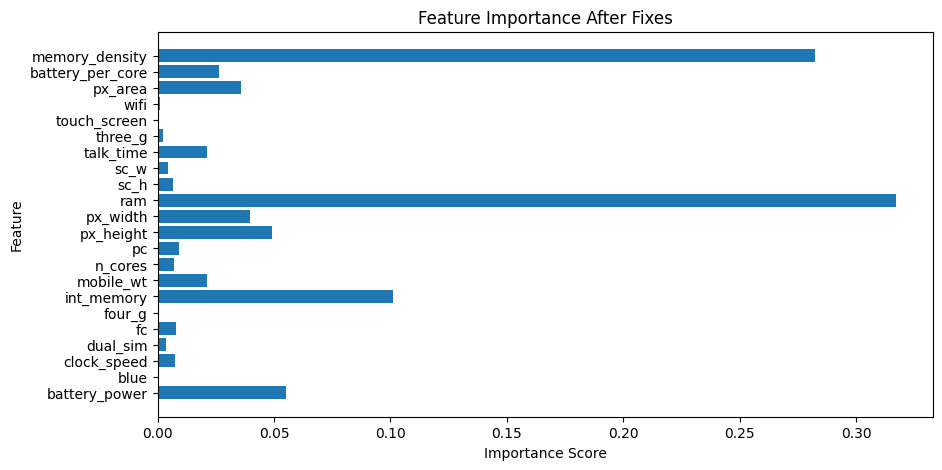

In [36]:
feature_importances = dtmodel.feature_importances_
feature_names = x.columns  

plt.figure(figsize=(10, 5))
plt.barh(feature_names, feature_importances)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance After Fixes")
plt.show()


In [37]:
'''
with open('logmodel.pkl','wb') as model_file:
    pickle.dump(model,model_file)
    
with open('nbmodel.pkl','wb') as model_file:
    pickle.dump(nbmodel,model_file)

with open('knn.pkl','wb') as model_file:
    pickle.dump(knnmodel,model_file)

with open('decisiontree.pkl','wb') as model_file:
    pickle.dump(dtmodel,model_file)
    
'''

"\nwith open('logmodel.pkl','wb') as model_file:\n    pickle.dump(model,model_file)\n\nwith open('nbmodel.pkl','wb') as model_file:\n    pickle.dump(nbmodel,model_file)\n\nwith open('knn.pkl','wb') as model_file:\n    pickle.dump(knnmodel,model_file)\n\nwith open('decisiontree.pkl','wb') as model_file:\n    pickle.dump(dtmodel,model_file)\n\n"